In [1]:
import pandas
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
frame = pandas.read_csv('small_gradient_stats.csv')

In [3]:
frame.head()

,Unnamed: 0,word,total_count,encoder_l1,encoder_l2,encoder_mean,encoder_magnitude,encoder_range,encoder_median,encoder_variance,...,rnn_variance,rnn_dispersion,decoder_l1,decoder_l2,decoder_mean,decoder_magnitude,decoder_range,decoder_median,decoder_variance,decoder_dispersion
0,0,regardless,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,0.150535,0.588742,0.084028,-0.000026,0.040963,0.069555,0.000024,0.000170,3.720297e+04
1,1,",",112474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.134298,3.054276,0.362575,-0.000031,0.165591,0.258405,-0.000183,0.000611,inf
2,2,their,4805.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.338795,3.596775,0.357372,-0.000024,0.116216,0.187106,-0.000370,0.000566,7.414791e+05
3,3,relationship,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000009,0.197574,2.079448,0.263717,0.000194,0.127671,0.206205,0.000089,0.000418,9.744966e+04
4,4,is,20786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.131065,3.137051,0.351860,0.000047,0.147661,0.235262,-0.000265,0.000559,inf


In [4]:
frame.columns

Index(['Unnamed: 0', 'word', 'total_count', 'encoder_l1', 'encoder_l2',
       'encoder_mean', 'encoder_magnitude', 'encoder_range', 'encoder_median',
       'encoder_variance', 'encoder_dispersion', 'rnn_l1', 'rnn_l2',
       'rnn_mean', 'rnn_magnitude', 'rnn_range', 'rnn_median', 'rnn_variance',
       'rnn_dispersion', 'decoder_l1', 'decoder_l2', 'decoder_mean',
       'decoder_magnitude', 'decoder_range', 'decoder_median',
       'decoder_variance', 'decoder_dispersion'],
      dtype='object')

In [5]:
frame = frame[frame.total_count != 0]
frame.head()

,Unnamed: 0,word,total_count,encoder_l1,encoder_l2,encoder_mean,encoder_magnitude,encoder_range,encoder_median,encoder_variance,...,rnn_variance,rnn_dispersion,decoder_l1,decoder_l2,decoder_mean,decoder_magnitude,decoder_range,decoder_median,decoder_variance,decoder_dispersion
0,0,regardless,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,0.150535,0.588742,0.084028,-0.000026,0.040963,0.069555,0.000024,0.000170,3.720297e+04
1,1,",",112474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.134298,3.054276,0.362575,-0.000031,0.165591,0.258405,-0.000183,0.000611,inf
2,2,their,4805.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.338795,3.596775,0.357372,-0.000024,0.116216,0.187106,-0.000370,0.000566,7.414791e+05
3,3,relationship,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000009,0.197574,2.079448,0.263717,0.000194,0.127671,0.206205,0.000089,0.000418,9.744966e+04
4,4,is,20786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.131065,3.137051,0.351860,0.000047,0.147661,0.235262,-0.000265,0.000559,inf


In [6]:
for column in frame.columns[3:]:
    print('correlation between word frequency and ', column, ': ', pearsonr(frame['total_count'], frame[column]))

correlation between word frequency and  encoder_l1 :  (nan, 1.0)
correlation between word frequency and  encoder_l2 :  (nan, 1.0)
correlation between word frequency and  encoder_mean :  (nan, 1.0)
correlation between word frequency and  encoder_magnitude :  (nan, 1.0)
correlation between word frequency and  encoder_range :  (nan, 1.0)
correlation between word frequency and  encoder_median :  (nan, 1.0)
correlation between word frequency and  encoder_variance :  (nan, 1.0)
correlation between word frequency and  encoder_dispersion :  (nan, 1.0)
correlation between word frequency and  rnn_l1 :  (-0.29626028196368864, 4.723839382104236e-13)
correlation between word frequency and  rnn_l2 :  (-0.29419121043683477, 6.964301613824401e-13)
correlation between word frequency and  rnn_mean :  (0.026383077994314035, 0.528877292023535)
correlation between word frequency and  rnn_magnitude :  (-0.28662830657359645, 2.8025027759297512e-12)
correlation between word frequency and  rnn_range :  (-0.287

/afs/inf.ed.ac.uk/group/incremental_models/miniconda3/envs/curriculum/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning:

invalid value encountered in double_scalars

/afs/inf.ed.ac.uk/group/incremental_models/miniconda3/envs/curriculum/lib/python3.6/site-packages/scipy/stats/stats.py:3000: RuntimeWarning:

invalid value encountered in subtract

/afs/inf.ed.ac.uk/group/incremental_models/miniconda3/envs/curriculum/lib/python3.6/site-packages/scipy/stats/stats.py:3001: RuntimeWarning:

invalid value encountered in reduce



Text(0.5,0,'word count')

Text(0,0.5,'decoder_variance')

Text(0.5,1,'Correlation between word frequency and gradient properties')

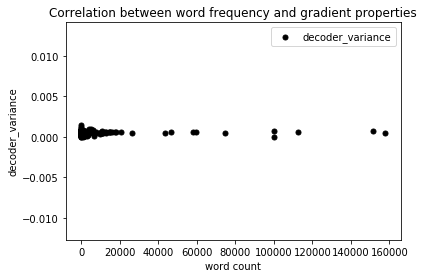

In [8]:
column = 'decoder_variance'
plt.scatter(frame['total_count'][:1000], frame[column][:1000], color='k', s=25, marker="o")

plt.xlabel('word count')
plt.ylabel(column)
plt.title('Correlation between word frequency and gradient properties')
plt.legend()
plt.show()

In [9]:
frame.head(50)


,Unnamed: 0,word,total_count,encoder_l1,encoder_l2,encoder_mean,encoder_magnitude,encoder_range,encoder_median,encoder_variance,...,rnn_variance,rnn_dispersion,decoder_l1,decoder_l2,decoder_mean,decoder_magnitude,decoder_range,decoder_median,decoder_variance,decoder_dispersion
0,0,regardless,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.924243e-06,-0.082426,0.588742,0.084028,-0.000026,0.040963,0.069555,0.000024,0.000170,-3.434305e+04
1,1,",",112474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.654334e-06,-0.017867,3.054276,0.362575,-0.000031,0.165591,0.258405,-0.000183,0.000611,inf
2,2,their,4805.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.285948e-06,0.108676,3.596775,0.357372,-0.000024,0.116216,0.187106,-0.000370,0.000566,1.822006e+05
3,3,relationship,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.093883e-06,-0.001645,2.079448,0.263717,0.000194,0.127671,0.206205,0.000089,0.000418,1.784410e+04
4,4,is,20786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.974719e-06,-0.031311,3.137051,0.351860,0.000047,0.147661,0.235262,-0.000265,0.000559,inf
5,5,incidental,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.089250e-05,0.067126,2.993705,0.298243,-0.000306,0.093862,0.150276,-0.000333,0.000416,-1.276922e+05
6,6,;,2834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.732796e-07,-0.224847,3.097559,0.372194,0.000023,0.173928,0.271367,-0.000148,0.000675,1.808070e+05
7,7,the,157921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.572591e-06,0.004389,3.314934,0.331296,0.000027,0.108337,0.174368,-0.000209,0.000494,inf
8,8,focus,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.226383e-05,0.083891,2.112300,0.263465,-0.000188,0.125961,0.196339,-0.000104,0.000444,5.024965e+04
9,9,of,74852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.637862e-06,0.166794,2.493011,0.302418,-0.000074,0.127912,0.220188,-0.000243,0.000480,inf
